In [343]:
import re
from collections import Counter
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import requests
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import time
from geopy.geocoders import Nominatim
from random import randint

In [308]:
from geonamescache import GeonamesCache
#import helpers
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import MarkerCluster

In [58]:
url = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log"
url1 = "https://github.com/ayedaemon/RuckSack-Python/blob/master/log_analysis/access_log2"
url2 = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"
url_all = [url,url1,url2]

In [3]:
def getips(location):
    with open(location) as f:
        logs=f.read()
        #regexp=r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
        regexp="(.*?)- -"
        re2='(GET|POST|OPTIONS)(.*?)(HTTP)'
    return re.findall(regexp,logs),re.findall(re2,logs)

def gettimestamps(location):
    with open(location) as f:
        logs=f.read()
        regexp='\[(.*?)\]'
    return re.findall(regexp,logs)
def get_size(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            mylist.append(re.findall(regexp,logs))
    return mylist

In [4]:
def get_location(ip):
    response = requests.get("https://geolocation-db.com/json/{}&position=true".format(ip)).json()
    return response['country_name']

In [5]:
def getstatuscode(location):
    mylist=[]
    with open(location) as f:
        for logs in f:
            regexp='\d+$'
            temp=logs
            val=re.sub(regexp,'',temp)
            mylist.append(re.findall('\d+\s$',val))
    return mylist

In [24]:
data=pd.DataFrame()
statuscode=getstatuscode("C:\\Users\\arjun\\Desktop\\totaldata.txt")
newsize=[]
for i in range(len(statuscode)-6):
    if statuscode[i]!=[]:
        newsize.append(int(statuscode[i][0]))
    else:
        newsize.append(0)
newsize=newsize[:3331]
data['statuscode']=newsize

In [ ]:
data

In [11]:
def getfreq(mylist):
    return dict(Counter(mylist))

In [377]:
allips,websites=getips("C:\\Users\\arjun\\Desktop\\totaldata.txt")
freq=getfreq(allips)
timestamps=gettimestamps("C:\\Users\\arjun\\Desktop\\totaldata.txt")



In [17]:
temp=timestamps
for i in temp:
    if i=='^A-Za-z':
        timestamps.remove('^A-Za-z')

In [378]:
allips1=allips[:3331]
timestamps1=timestamps[:3331]


In [346]:
lister=[randint(500, 2500) for iter in range(100)]


In [28]:
data['IP']=allips1
data['TimeStamp']=timestamps1

In [29]:
for i in range(len(websites)):
    websites[i]=websites[i][1]

In [30]:
websites

[' / ',
 ' /cgi-bin/weakform.py ',
 ' /cgi-bin/weak_form.py ',
 ' / ',
 ' /noindex/common/css/bootstrap.min.css ',
 ' /noindex/common/css/styles.css ',
 ' /noindex/common/images/pb-centos.png ',
 ' /noindex/common/images/pb-apache.png ',
 ' /noindex/common/images/centos-header.png ',
 ' /cgi-bin/weak_form.py ',
 ' /favicon.ico ',
 ' /cgi-bin/weakform.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /favicon.ico ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py?fname=asdasd&lname=asdasdas ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py ',
 ' /cgi-bin/weak_form.py?MWJGSAPGA=LMODYLU ',
 ' /cgi-bin/weak_form.py?AFN=DFBKFG ',
 ' /cgi-bin/weak_form.py?PPQIMGEGM=KBN ',
 ' /cgi-bin/weak_form.py?TGCAKKM=DSJDYWMHQ ',
 ' /cgi-bin/weak_form.py?SFXABPHMK=KPH ',
 ' /cgi-bin/wea

In [31]:
data['websites']=websites

In [32]:
data

,statuscode,IP,TimeStamp,websites
0,0,127.0.0.1,15/Jan/2021:08:54:07 +0000,/
1,0,127.0.0.1,15/Jan/2021:08:55:23 +0000,/cgi-bin/weakform.py
2,0,127.0.0.1,15/Jan/2021:09:01:38 +0000,/cgi-bin/weak_form.py
3,0,172.17.0.1,15/Jan/2021:09:02:14 +0000,/
4,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/css/bootstrap.min.css
5,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/css/styles.css
6,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/pb-centos.png
7,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/pb-apache.png
8,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/centos-header.png
9,0,172.17.0.1,15/Jan/2021:09:02:27 +0000,/cgi-bin/weak_form.py


In [33]:
date=[]
for i in range(len(data)):
    date.append(timestamps[i][:2])

In [34]:
month=[]
for i in range(len(data)):
    month.append(timestamps[i][3:6])

In [35]:
time=[]
for i in range(len(data)):
    time.append(timestamps[i][12:20])
data['time']=time

In [36]:
data['month']=month

In [39]:
mysize=get_size("totaldata.txt")

In [42]:
newsize=[]
for i in range(len(mysize)-6):
    if mysize[i]!=[]:
        newsize.append(int(mysize[i][0]))
    else:
        newsize.append(0)
newsize=newsize[:3331]

In [45]:
data['size']=newsize

In [46]:
ip=[]
count=[]
for key,value in freq.items():
    if value>1:
        ip.append(key)
        count.append(value)
    

# Top 10 Visitors to website

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

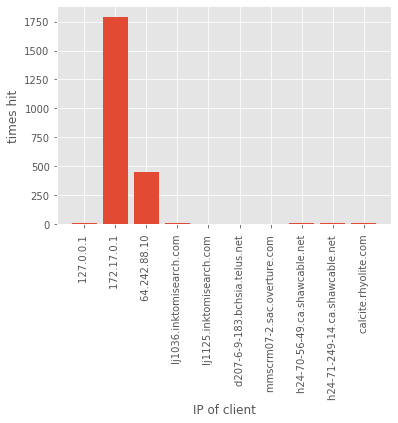

In [130]:
plt.bar(ip[:10],count[:10])
plt.xlabel("IP of client")
plt.ylabel("times hit")
plt.xticks(rotation=90)

In [78]:
def html_to_df(urls, clean_empty = False , attrs = {}, helper = None):
    df_l = []
    for url in urls:
        html_content = requests.get(url).text
        soup = bs(html_content, "lxml")
        table = str(soup.find("table", attrs=attrs))
        df = pd.read_html(str(table))[0]
    
        if clean_empty :
            df = df.loc[:, ~df.isnull().all(axis = 0)]
        
        if helper:
            df = helper(df) 
        df_l.append(df)
    return pd.concat(df_l,ignore_index=True)

In [82]:
df = html_to_df(url_all,clean_empty=True)

In [83]:
def helper(df):
    df = pd.DataFrame(list(df[1].apply(lambda x: x.split())))
    df[3] = df[3].apply(lambda x: x.replace('[','') )
    df[4] = df[4].apply(lambda x: x.replace(']','') )
    df[5] = df.apply(lambda x : ' '.join([x[5],x[6]]).replace('"',''), axis = 1)
    df.drop([1,2,7,6],inplace=True,axis = 1)
    return df

In [84]:
columns = ["User Address","RFC931","User","Date","GMT","Action","Status","Size","Referrer","Browser"]
df = log_df(df,1,columns)

In [119]:
data.head()

,statuscode,IP,TimeStamp,websites,time,month,size,browsers
0,0,127.0.0.1,15/Jan/2021:08:54:07 +0000,/,08:54:07,Jan,0,curl/7.61.1
1,0,127.0.0.1,15/Jan/2021:08:55:23 +0000,/cgi-bin/weakform.py,08:55:23,Jan,0,curl/7.61.1
2,0,127.0.0.1,15/Jan/2021:09:01:38 +0000,/cgi-bin/weak_form.py,09:01:38,Jan,0,curl/7.61.1
3,0,172.17.0.1,15/Jan/2021:09:02:14 +0000,/,09:02:14,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...
4,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/css/bootstrap.min.css,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...


In [91]:
browsers=df['RFC931']

In [106]:
def OS_dict(browser_series):
    os = ['Windows','Linux','Opera','Other']
    res_dict = {o:0 for o in os}
    for browser in browser_series:
        flag = 0
        for i in os[:-1]:
            if i in browser:
                res_dict[i]+=1
                flag = 1
                break
        if flag==0:
            res_dict['Other']+=1
    return res_dict

In [107]:
OS = OS_dict(data['browsers'])

# Pie chart for per OS visits

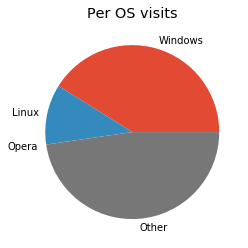

In [129]:
plt.pie( list(OS.values()), labels=list(OS.keys()))
plt.title("Per OS visits")
plt.show()

In [110]:
def XSS_finder(str_):
    flag = 0
    l1 = ['<','>','\\','`']
    l2 = ['/',')','(']
    for char in l1:
        aasci_encoding = '%'+hex(ord(char)).replace('0x','')
        if (char in str_) or (aasci_encoding in str_):
            flag = 1
            break
    if flag != 1:
        try:
            req_str = ''.join(str_.split('?')[1:])
            for char in l2:
                aasci_encoding = '%'+hex(ord(char)).replace('0x','')
                if (char in req_str) or (aasci_encoding in req_str):
                    flag = 1
                    break
        except:
            pass
    return bool(flag)

In [341]:
data

,statuscode,IP,TimeStamp,websites,time,month,size,browsers,XSS_attack,date
0,0,127.0.0.1,15/Jan/2021:08:54:07 +0000,/,08:54:07,Jan,0,curl/7.61.1,False,15
1,0,127.0.0.1,15/Jan/2021:08:55:23 +0000,/cgi-bin/weakform.py,08:55:23,Jan,0,curl/7.61.1,False,15
2,0,127.0.0.1,15/Jan/2021:09:01:38 +0000,/cgi-bin/weak_form.py,09:01:38,Jan,0,curl/7.61.1,False,15
3,0,172.17.0.1,15/Jan/2021:09:02:14 +0000,/,09:02:14,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
4,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/css/bootstrap.min.css,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
5,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/css/styles.css,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
6,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/pb-centos.png,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
7,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/pb-apache.png,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
8,0,172.17.0.1,15/Jan/2021:09:02:15 +0000,/noindex/common/images/centos-header.png,09:02:15,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15
9,0,172.17.0.1,15/Jan/2021:09:02:27 +0000,/cgi-bin/weak_form.py,09:02:27,Jan,0,Mozilla/5.0 (X11; Linux x86_64; rv:84.0) Gecko...,False,15


In [121]:
df['XSS_attack']=df['Action'].apply(XSS_finder)

In [125]:
df['XSS_attack'].value_counts()

False    3343
True        3
Name: XSS_attack, dtype: int64

In [127]:
data['XSS_attack']=df['Action'].apply(XSS_finder)

# XSS Attack

In [134]:
date=[]
for i in range(len(data)):
    date.append(timestamps[i][:2])

In [136]:
data['date']=date

In [373]:
data[data['XSS_attack']==True]

,statuscode,IP,TimeStamp,websites,time,month,size,browsers,XSS_attack,date
505,0,172.17.0.1,15/Jan/2021:09:34:15 +0000,/cgi-bin/weak_form.py?JSLXULK=FEOFJ,09:34:15,Jan,0,Mozilla/5.0 (Windows; U; MSIE 7.0; Windows NT ...,True,15
531,0,172.17.0.1,15/Jan/2021:09:34:07 +0000,/cgi-bin/weak_form.py?TSXEY=RJOYUG,09:34:07,Jan,0,Mozilla/5.0 (X11; U; Linux x86_64; en-US; rv:1...,True,15
583,0,172.17.0.1,15/Jan/2021:09:34:09 +0000,/cgi-bin/weak_form.py?IWBEXD=HDLACRQEL,09:34:09,Jan,0,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,True,15
594,0,172.17.0.1,15/Jan/2021:09:34:10 +0000,/cgi-bin/weak_form.py?NMQSFGC=LPIUIHDK,09:34:10,Jan,0,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,True,15
626,0,172.17.0.1,15/Jan/2021:09:34:12 +0000,/cgi-bin/weak_form.py?ROQXXGRYC=IFQCWN,09:34:12,Jan,0,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,True,15
627,0,172.17.0.1,15/Jan/2021:09:34:12 +0000,/cgi-bin/weak_form.py?YCILYSR=KNCPL,09:34:12,Jan,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,True,15
655,0,172.17.0.1,15/Jan/2021:09:34:05 +0000,/cgi-bin/weak_form.py?QKNKJGJ=OXYEWBVY,09:34:05,Jan,0,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,True,15
657,0,172.17.0.1,15/Jan/2021:09:34:15 +0000,/cgi-bin/weak_form.py?PVHH=CFFULPJIQ,09:34:15,Jan,0,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,True,15
696,0,172.17.0.1,15/Jan/2021:09:34:16 +0000,/cgi-bin/weak_form.py?TKBSWCQO=OBLLA,09:34:16,Jan,0,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,True,15
701,0,172.17.0.1,15/Jan/2021:09:34:17 +0000,/cgi-bin/weak_form.py?TWYVQX=RHAU,09:34:17,Jan,0,Opera/9.80 (Windows NT 5.2; U; ru) Presto/2.5....,True,15


In [159]:
per_day_visits=data.groupby(['date','IP']).size()

In [179]:
per_day_visits

0
date IP                                              
07   206-15-133-181.dialup.ziplink.net              1
     64.242.88.10                                 169
     80-219-148-207.dclient.hispeed.ch              1
     bh02i525f01.au.ibm.com                         1
     calcite.rhyolite.com                           1
     d207-6-9-183.bchsia.telus.net                  3
     h24-70-56-49.ca.shawcable.net                  7
     h24-71-249-14.ca.shawcable.net                 6
     lj1036.inktomisearch.com                       2
     lj1088.inktomisearch.com                       1
     lj1090.inktomisearch.com                       1
     lj1125.inktomisearch.com                       1
     lordgun.org                                    1
     mmscrm07-2.sac.overture.com                    1
08   10.0.0.153                                    66
     128.227.88.79                                 14
     200.160.249.68.bmf.com.br                      2
     212.92.37.62                                  14
     213.181.81.4                                   1
     219.95.17.51                                   1
     61.9.4.61                                      3
     64.242.88.10                                 283
     64.246.94.152                                  1
     66-194-6-70.gen.twtelecom.net                  1
     66.213.206.2                                   1
     68-174-110-154.nyc.rr.com                      3
     92-moc-6.acn.waw.pl                            3
     a213-84-36-192.adsl.xs4all.nl                  1
     acbf6930.ipt.aol.com                           2
     alille-251-1-2-197.w82-124.abo.wanadoo.fr      1
...                                               ...
11   lj1120.inktomisearch.com                       1
     lj1145.inktomisearch.com                       1
     lj1153.inktomisearch.com                       1
     lj1212.inktomisearch.com                       1
     lj1223.inktomisearch.com                       1
     mmscrm07-2.sac.overture.com                    1
     ns3.vonroll.ch                                 3
     ogw.netinfo.bg                                19
     osdlab.eic.nctu.edu.tw                         1
     pd9eb1396.dip.t-dialin.net                     1
     spica.ukc.ac.uk                                2
     wc03.mtnk.rnc.net.cable.rogers.com             1
     wc09.mtnk.rnc.net.cable.rogers.com             3
12   10.0.0.153                                    20
     145.253.208.9                                  7
     195.11.231.210                                 1
     61.165.64.6                                    4
     66-194-6-71.gen.twtelecom.net                  1
     67.131.107.5                                   3
     80.58.33.42.proxycache.rima-tde.net            3
     lj1008.inktomisearch.com                       1
     lj1024.inktomisearch.com                       2
     lj1115.inktomisearch.com                       1
     lj1123.inktomisearch.com                       1
     lj1223.inktomisearch.com                       1
     ns.wtbts.org                                  12
     vlp181.vlp.fi                                  1
15   127.0.0.1                                      8
     172.17.0.1                                  1502
16   172.17.0.1                                   290

[202 rows x 1 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

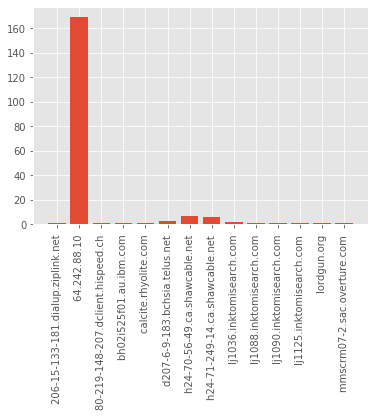

In [198]:
t=list(per_day_visits.loc['07'][0].values)
f=per_day_visits.loc['07'][0].index
plt.bar(f,t)
plt.xticks(rotation=90)

# Times User visited websites each day (Zoom for clearer view)

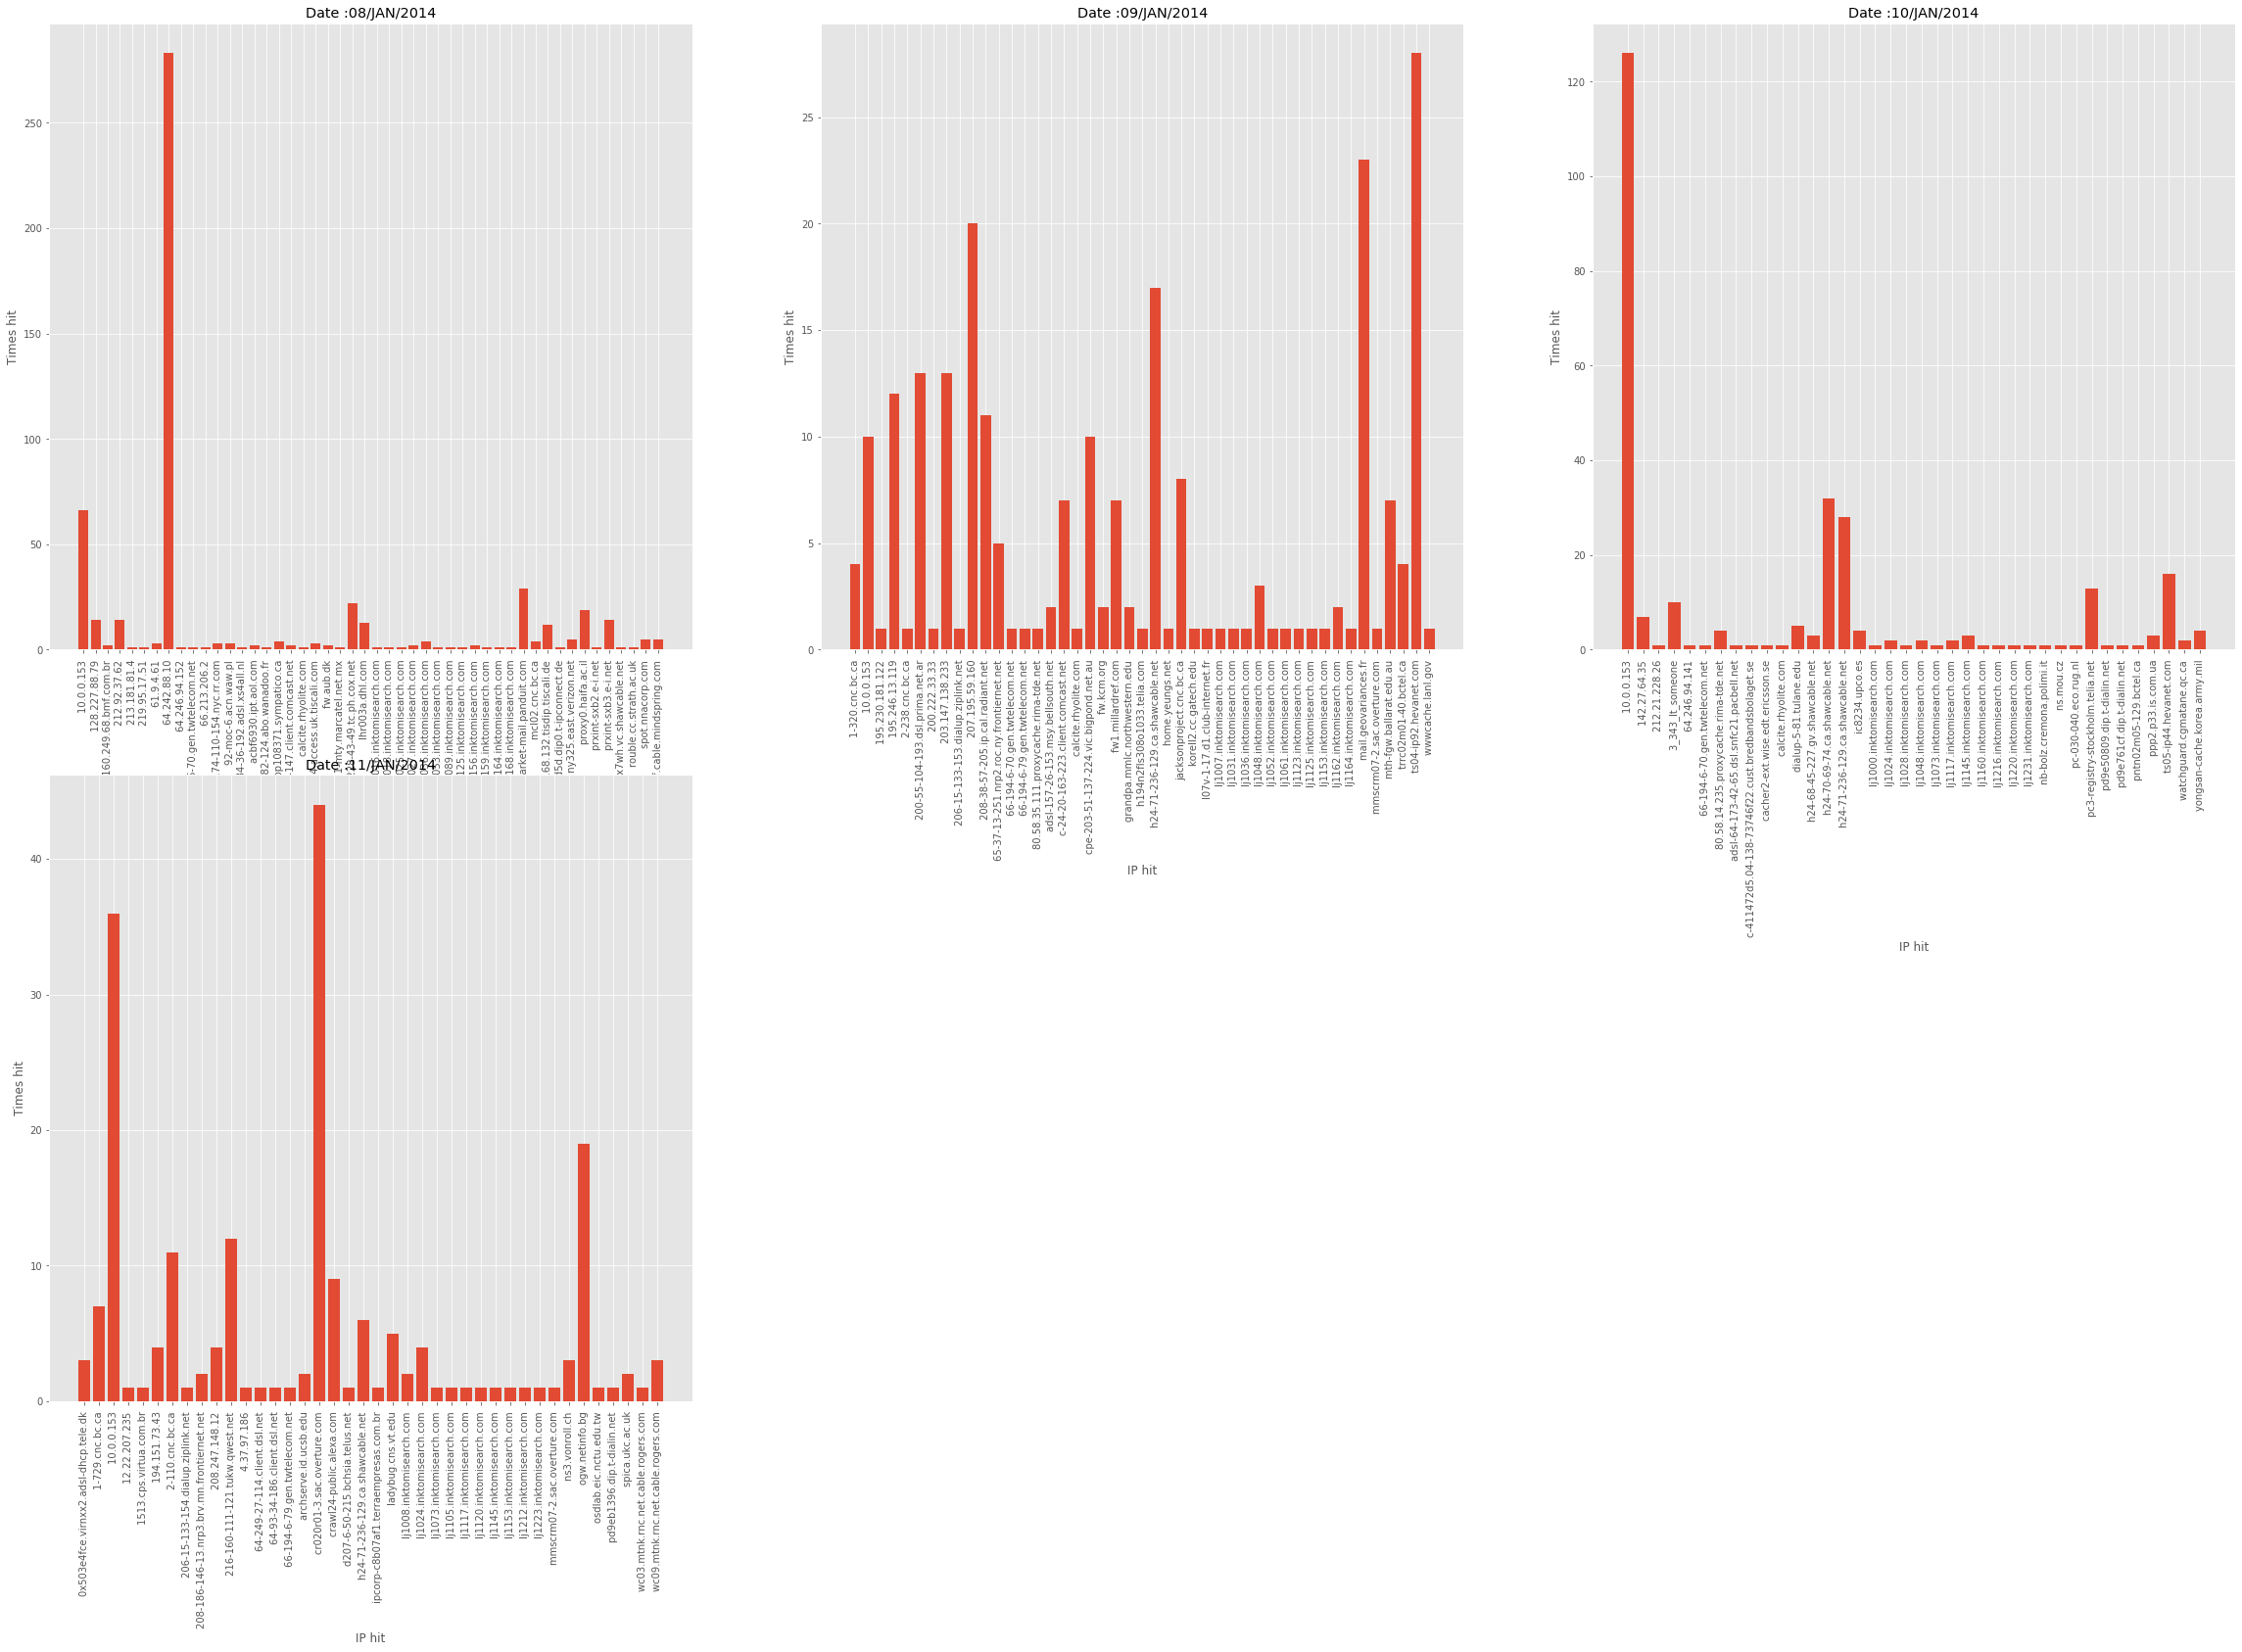

In [375]:
#fig,a =  plt.subplots(3,3,figsize=(15,15))
counter=0
fig = plt.figure(figsize=(40,40))
for i in range(1,5):
    temp1=dates[i]
    ax = fig.add_subplot(3,3,i)
    index=per_day_visits.loc[dates[i]][0].index
    freq=list(per_day_visits.loc[dates[i]][0].values)
    ax.bar(index,freq)
    plt.xticks(rotation=90)
    plt.title(f"Date :{dates[i]}/JAN/2014")
    plt.xlabel("IP hit")
    plt.ylabel("Times hit")

        
        

# Top 5 visited users

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

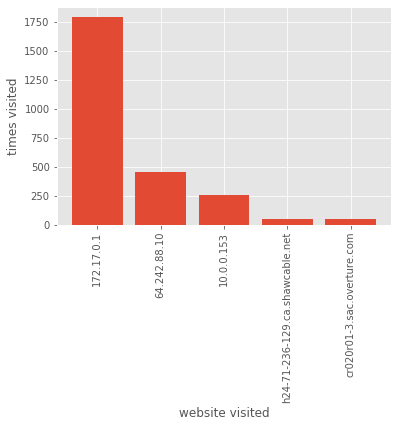

In [374]:
ip_freq=data['IP'].value_counts()
ip_freq
index=list(ip_freq[:5].index)
plt.bar(index,ip_freq[:5])
plt.xlabel("website visited")
plt.ylabel("times visited")
plt.xticks(rotation=90)

In [233]:
visited=[]
for i in data['websites']:
    visited.append(i[1:-1])


In [235]:
visit_website=[]
regexp="^/(.*?)/"
for i in visited:
    try:
        temp=re.findall(regexp,i)[0]
        visit_website.append(temp)
    except:
        visit_website.append("")

In [238]:
visit_website=pd.Series(visit_website)

In [240]:
cleaned_visited=[]
for i in visit_website:
    if i!='':
        cleaned_visited.append(i)

In [269]:
cleaned_visited=pd.Series(cleaned_visited)
req=cleaned_visited.value_counts()
indexer=req.index
req.values[::-1][1:3]

array([ 1, 14], dtype=int64)

# Most Websites Visited

Text(0, 0.5, 'number of times used')

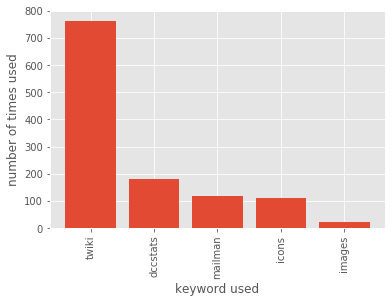

In [264]:
index_visited=list(cleaned_visited.index)
plt.bar(indexer[1:6],req.values[1:6])
plt.xticks(rotation=90)
plt.xlabel("keyword used")
plt.ylabel("number of times used")

# least visited websites

Text(0, 0.5, 'number of times used')

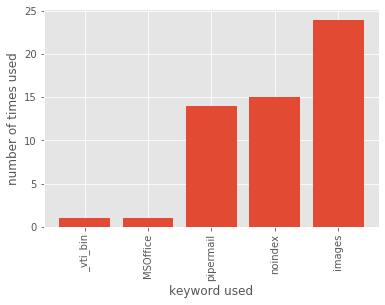

In [270]:
plt.bar(indexer[::-1][0:5],req.values[::-1][0:5])
plt.xticks(rotation=90)
plt.xlabel("keyword used")
plt.ylabel("number of times used")

In [286]:
counter=0
for i in range(len(data['IP'])):
    data['IP'][i]=data['IP'][i][:-1]
    print(counter)
    counter+=1

C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [284]:
data['IP']=allips1

In [289]:

start = time.time()
already=[]
records=[]
location=[]
counter=0
for i in data['IP']:
    i=str(i)
    if i not in already:
        try:
            temp=get_location(i)
            already.append(i)
            records.append([i,temp])
            location.append(temp)
            print(counter)
            counter+=1
        except:
            pass
    else:
        for k in records:
            if k[0]==i:
                location.append(k[1])
        print(counter)
        counter+=1
print(time.time()-start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [290]:
get_location(data['IP'][0])

'Not found'

In [291]:
unique_ip=data['IP'].unique()

In [292]:
len(unique_ip)

171

In [293]:
unique_ip

array(['127.0.0.1', '172.17.0.1', '64.242.88.10', 'lordgun.org',
       'lj1036.inktomisearch.com', 'lj1090.inktomisearch.com',
       'lj1125.inktomisearch.com', 'd207-6-9-183.bchsia.telus.net',
       '80-219-148-207.dclient.hispeed.ch',
       '206-15-133-181.dialup.ziplink.net', 'mmscrm07-2.sac.overture.com',
       'h24-70-56-49.ca.shawcable.net', 'bh02i525f01.au.ibm.com',
       'h24-71-249-14.ca.shawcable.net', 'calcite.rhyolite.com',
       'lj1088.inktomisearch.com',
       'dsl-80-43-113-44.access.uk.tiscali.com',
       'lj1089.inktomisearch.com', 'lj1016.inktomisearch.com',
       'lj1025.inktomisearch.com', 'prxint-sxb3.e-i.net',
       'prxint-sxb2.e-i.net', 'rouble.cc.strath.ac.uk', '213.181.81.4',
       'lj1159.inktomisearch.com', 'p213.54.168.132.tisdip.tiscali.de',
       '200.160.249.68.bmf.com.br', '68-174-110-154.nyc.rr.com',
       '66-194-6-70.gen.twtelecom.net', 'lj1027.inktomisearch.com',
       '128.227.88.79', '61.9.4.61', 'mcl02.cnc.bc.ca',
       'p5083cd5

In [376]:

locate=pd.Series(location)

In [ ]:
freq_locate=locate.value_counts()

locate_index=list(freq_locate.index)
freq_locate=list(freq_locate)

# Country wise hits 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

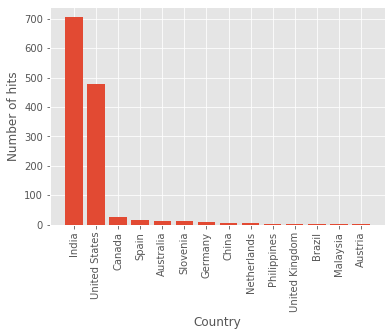

In [301]:
plt.bar(locate_index[1:],freq_locate[1:])
plt.xlabel("Country")
plt.ylabel("Number of hits")
plt.xticks(rotation=90)

In [302]:
geodata=[]
for i in range(len(locate_index)):
    temp=[locate_index[i]]*freq_locate[i]
    geodata.append(temp)

In [304]:
flat_list = [item for sublist in geodata for item in sublist]

In [307]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [309]:
locate_index

['Not found',
 'India',
 'United States',
 'Canada',
 'Spain',
 'Australia',
 'Slovenia',
 'Germany',
 'China',
 'Netherlands',
 'Philippines',
 'United Kingdom',
 'Brazil',
 'Malaysia',
 'Austria']

In [310]:
loc_codes=['IND','USA','CAN','ESP','AUS','SVN','DEU','CHN','NLD','PHL','GBR','MYS','AUT','BRA']

In [325]:
locate_index.remove('Not found')

In [321]:
newlist=[i for i in flat_list if i!='Not found']

In [327]:
codes=[]
for i in newlist:
    for j in range(len(locate_index)):
        if i==locate_index[j]:
            codes.append(loc_codes[j])

In [329]:
#world_map= folium.Map(tiles="cartodbpositron")
world_map= folium.Map(control_scale=True)

In [331]:
marker_cluster = MarkerCluster().add_to(world_map)

In [332]:
geolocator = Nominatim(user_agent="myappname")
def geolocate(country):
    try:
        loc = geolocator.geocode(country)
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [333]:
latitude=[]
longitude=[]
counter=0
for i in loc_codes:
    temp=geolocate(i)
    latitude.append(temp[0])
    longitude.append(temp[1])
    print(counter)
    counter+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [334]:
newlati=[]
newlongi=[]
for i in codes:
    for j in range(len(loc_codes)):
        if i==loc_codes[j]:
            newlati.append(latitude[j])
            newlongi.append(longitude[j])
            

In [335]:
for i in range(len(newlati)):
        lat = newlati[i]
        long = newlongi[i]
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
      #  popup_text = popup_text.format(data['IP']
       #                            )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

In [336]:
world_map